## Income based on College Major 
The aim of the following project is to show the ralationship between earnings and college majors. We will visualize the outcomes of our data analysis using scatter plots, bar plots, histograms, stacked bar plots, hexagonal bin plots. We will show what is the tendency between incomes in various major groups. Furthermore, we will answer the question regarding the relationship between the popularity of the major and the hight of the earnings. We will also look which majors are predominantly female or male.
Our dataset comes from job results of students who graduated from college between 2010 and 2012. The original version of the data was released by American Community Survey, which conducts surveys and aggregates the data. Then, the data has been cleaned.

To start the whole analyse process we will first of all import all the necessary libraries as well as open the csv file contining our dataset. Secondly, we would like to get to know the data we will be working with. We can print the first row formatted as a table using DataFrame.iloc\[\]. Other usufull techniques will include DataFram.head(), DataFrame.tail(), DataFrame.dropna().

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Setting static images of plot embedded in the notebook
%matplotlib inline
# Read our data set into pandas
recent_grads = pd.read_csv('recent-grads.csv', encoding='Windows-1252')
# Getting familiar with our data set
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

As displayed above, we can see what columns in our datasets are (Rank, Major_code, Major etc.) as well as first row values for these columns. In our analyze we will be mostly interested in Major, Men, Women, Major_category, College_jobs columns.

In [2]:
# Generating summary statistics for numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Above we can examine what the summary statistics for our columns looks like. Our data set counts 173 rows and 21 columns. We will mainly focus on ShareWomen, Sample_size, Employed, Major, Unemployment_rate and Median columns in our analysis.
Our next step will be to skip rows that contain missing values.

In [3]:
# Dropping rows with missing values
recent_grads = recent_grads.dropna()
# Checking the number of rows and columns
cleaned_grads = recent_grads.shape
print(cleaned_grads)

(172, 21)


As we can notice above, only one row contained missing values and was removed. 

## Pandas, scatter plots

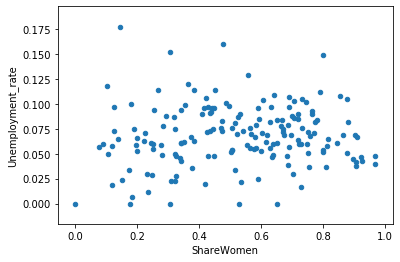

In [4]:
# Generating a scatter plot for columns ShareWomen and Unemployment_rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

In the above scatter plot we can observe that there is no correlation between share women and unemployment rate. Once share women in a particular major is high it does not mean the unemployment rate will be high as well.

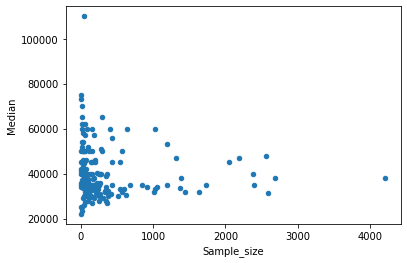

In [5]:
# Generating a scatter plot for columns Sample_size and Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

Median represents the median salary of full-time, year-round workers. Without some outliers, we can observe a positive correlation between Median and Sample_size. The more popular the major is, the higher pay students usually receive.

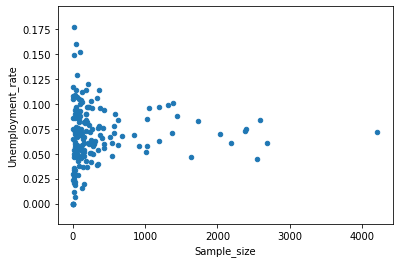

In [6]:
# Generating a scatter plot for columns Sample_size and Unemployment_rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

In case of Unemployment_rate and Sample_size we can rather notice no correlation, which means that the more popular the major does not necessarily mean the higher unemployment rate.

## Pandas, histograms

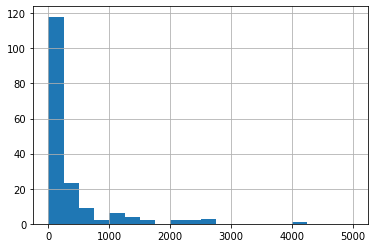

In [7]:
# Generating a histogram for Sample_size column
recent_grads['Sample_size'].hist(bins=20, range=(0,5000))

The most frequent in our data set are small samples. More than 500 happens to be a case for less than 10 outcomes.

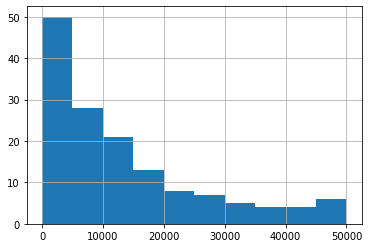

In [8]:
# Generating a histogram for Employed column
recent_grads['Employed'].hist(bins=10, range=(0,50000))

Employed column informs about the number of employed workers. The most frequent in our data set are the values ranging from 0 to 5000 employees. 

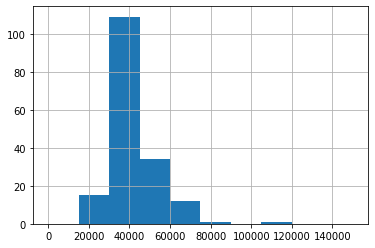

In [9]:
# Generating a histogram for Median column
recent_grads['Median'].hist(bins=10, range=(0,150000))

When it comes to median salary, the most common is range from about 32000 to 42000.

## Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002052454D080>,
      dtype=object)

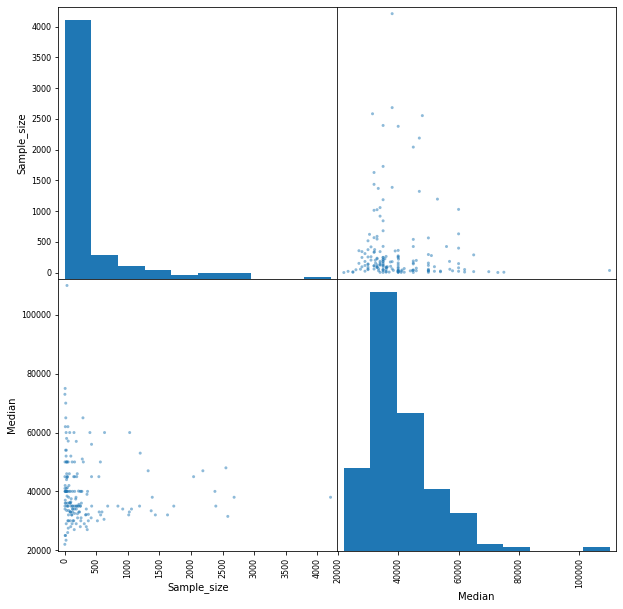

In [10]:
# importing scatter_matrix module
from pandas.plotting import scatter_matrix
# Generating scatter_matrix for columns Sample_size and Median
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

We used scatter.matrix() function to better compare frequency distribution and correlation in Sample_size and Median columns. Regarding the median salary, the most common range is from about 32000 to 42000. The most frequent in our data set are small samples. More than 500 happens to be a case for less than 10 outcomes. 
Without some outliers, we can observe a positive correlation between Median and Sample_size. The more popular the major is, the higher pay students usually receive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020524935B70>,
      dtype=object)

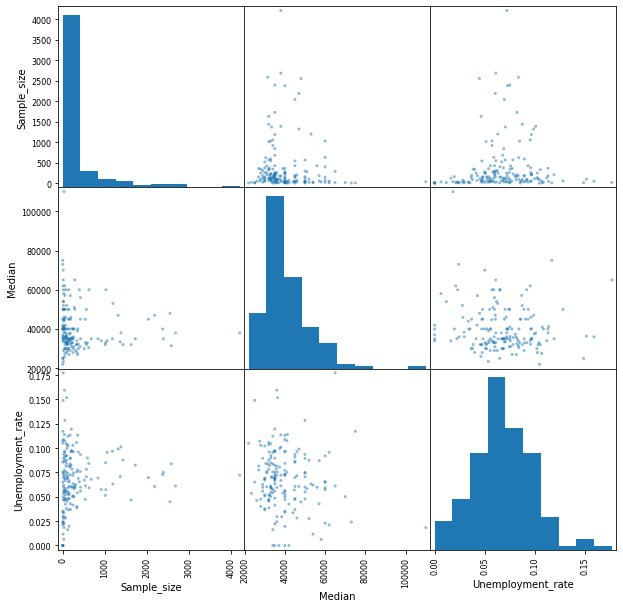

In [11]:
# Generating scatter_matrix for columns Sample_size, Median and Unemployment_rate
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

Once we add Unemployment_rate column to our matrix, we can observe everything we have done so far more quickly. In case of Unemployment_rate and Sample_size we can rather notice no correlation, which means that the more popular the major does not necessarily mean the higher unemployment rate. The similar situation occurs (no correlation) when we look at Unemployment_rate and Median scatter plot. Frequency distribution of Unemployment_rate is presented on the last histogram. We can see that highest frequency is when Unemployment_rate is between 0,05 and 0,10.

## Bar plots

In this part of our project we will create two bar plots. One to compare the percentage of women from the first ten rows and last ten rows. Another one will be to analyze the first ten rows and last ten rows of the Unemployment_rate column.

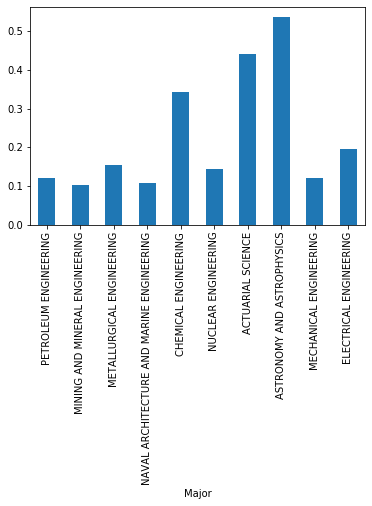

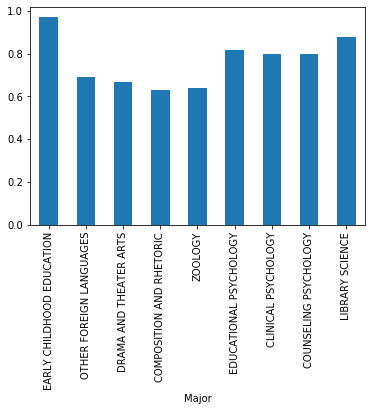

In [12]:
# Generating bar plots for columns Major and ShareWomen
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

The least popular majors among women fall in engineering industry. The most common majors include early childhood education, various psychology majors, library science.

## Stacked bar plot

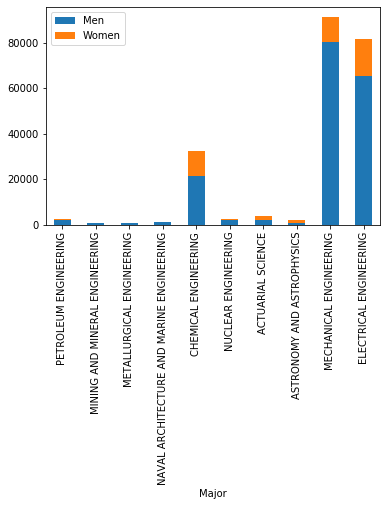

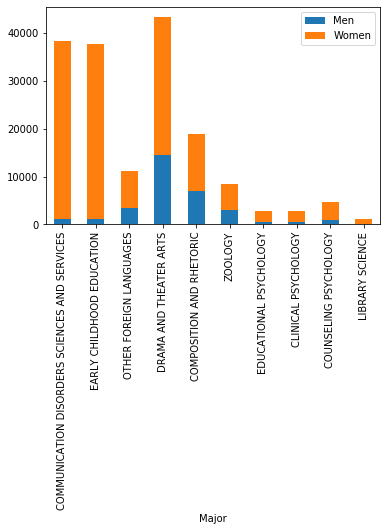

In [14]:
# Generating stacked bar plots for columns Major, Men and Women
recent_grads[:10].plot.bar(x='Major', y=['Men','Women'], stacked=True)
recent_grads[recent_grads.shape[0]-10:].plot.bar(x='Major', y=['Men','Women'], stacked=True)

To extend our visualization we generated also stacked bar charts. We can observe how the proportion of men and women looks like among the least popular majors by women and the most popular ones. On the first graph we notice that in case of chemical engeneering, astronomy and actuarial science the proportion of women is the highest. On the second graph we can see that the biggest proportion of men is in drama and theaters and composition and rethoric majors.

## Box plot

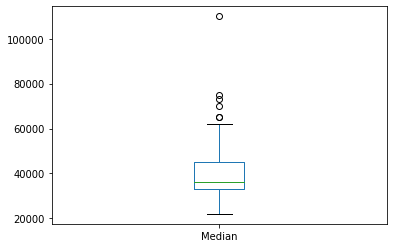

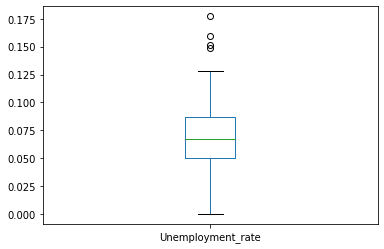

In [16]:
# Generating box plots
recent_grads.plot.box(y="Median")
recent_grads.plot.box(y="Unemployment_rate")

The above boxes help us understand how values in the distribution are spread out. Median salary of full-time, year-round  workers span mainly around  35000 and 42000, while in case of unemloyment rate it is from about 0,050-0,080.

## Hexagonal bin plot

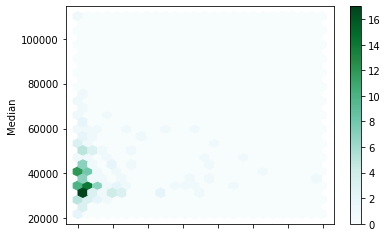

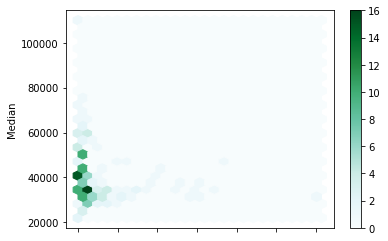

In [19]:
# Generating hexagonal bin plots
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=25, reduce_C_function=np.max)
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=25, reduce_C_function=np.max)

Hexagonal Binning is a helpful way to manage the issue of having to many points that start to overlap. Hexagonal binning plots density, rather than points. Points are binned into gridded hexagons and distribution (the number of points per hexagon) is displayed using either the color or the area of the hexagons ([source](https://datavizproject.com/data-type/hexagonal-binning/)). 

We generated two hexagonal plots:
- for Men and Median columns
- for Women and Median columns.

In both cases we can observe highest density in left-down part of charts.


## Conclusions

The relationship between earnings and college majors shows that the more popular the major among students, the higher will be the salary. We observed the tendency of higher incomes in engineering major groups. We noticed that engineering majors are least popular among women. The most common majors in case of women include early childhood education, various psychology majors, library science. In the examined data set the most frequent number of employees ranged from 0 to 5000 employees. 